# week 7

### 1.1 다음 코드를 실행해서 데이터 프레임을 생성하세요

In [2]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

### 1.2 데이터 프레임을 확인하고, X= calory, breakfast, lunch, dinner, exercise / y=body shape로 변수 분리하세요

In [3]:
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


In [11]:
X = df.iloc[:,:5]
Y = df.iloc[:,5:6]

### 1.3 X 데이터 값의 범위가 균일하지 않으므로 standard scaler를 이용해서 리스케일 해주세요

In [19]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit_transform(X)

### 1.4 사이킷런 PCA 클래스를 이용해서 5차원 데이터를 1차원으로 변환하고 shape를 확인해주세요

In [22]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(x_scaler)
x_pca = pca.transform(x_scaler)
print(x_pca.shape)

(10, 1)


### 1.5 explained_variance_ratio_ 변수를 이용해서 보존된 변동성 비율을 확인해주세요

In [23]:
pca.explained_variance_ratio_

array([0.73183217])

### 1.6 적절한 차원의 수 선택하기 - 원본 데이터셋의 분산을 95%로 유지하는데 필요한 최소한의 PC 개수 즉 차원 수 d를 구하세요

In [27]:
import numpy as np
pca = PCA()
pca.fit(x_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1
print(d)

4


### 1.7 n_components를 설정하여 PCA를 다시 실행하는 인자로 보존할 분산의 비율을 넣어주세요. (분산의 비율 : 0.95) 이를 X_reduced에 저장하세요 그 후 shape을 통해서 몇차원으로 압축되었는지 확인하세요

In [30]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_scaler)
X_reduced.shape

(10, 4)

### 1.8 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 다시 원래의 차원으로 되돌리세요 그 후 shape을 통해서 원래의 차원으로 잘 돌아왔는지 확인하세요

In [32]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(10, 5)

### 1.9 랜덤 PCA를 이용하여 데이터를 2차원으로 압축하세요. (random_state=42)




In [36]:
rnd_pca = PCA(n_components = 2, svd_solver = "randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(x_scaler)
X_reduced.shape

(10, 2)

### 1.10 점진적 PCA를 이용하여 데이터를 4차원으로 압축하세요. (배치사이즈:2) 그 후 shape을 통해 확인하세요




In [37]:
from sklearn.decomposition import IncrementalPCA

In [40]:
n_batches = 2
inc_pca = IncrementalPCA(n_components=4)
for X_batch in np.array_split(x_scaler, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(x_scaler)
X_reduced.shape

(10, 4)

### 1.11 커널 PCA를 이용하여 데이터를 2차원으로 압축하세요. (kernel="rbf",gamma=0.4) 그 후 shape을 통해 확인하세요


In [41]:
from sklearn.decomposition import KernelPCA

In [43]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(x_scaler)
X_reduced.shape

(10, 2)

### 1.12 커널 PCA의 하이퍼파라미터를 선택하세요 kPCA를 이용하여 2차원으로 축소하고 Logistic Regression으로 Classification을 진행하세요. 그 다음 가장 높은 accuracy를 얻기 위해 GridSearchCV를사용하여 kPCA에 가장 좋은 커널과 gamma 파라미터를 구하세요.
이때, kpca__kernel은 ["linear", "poly", "rbf", "sigmoid", "cosine"], kpca__gamma"은 np.linspace(0.03, 0.05, 1,2,10)


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [53]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 1,2,10),
    "kpca__kernel" : ["linear", "poly", "rbf", "sigmoid", "cosine"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_scaler, Y)

C:\Users\namyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\namyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\namyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\namyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': (array([0.03]), nan),
                          'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                           'cosine']}])

In [54]:
print(grid_search.best_params_)

{'kpca__gamma': array([0.03]), 'kpca__kernel': 'linear'}


### 2.1 다음 iris 데이터 세트를 출력해주세요

In [55]:
from sklearn.datasets import load_iris
iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

In [59]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2.2 X 데이터 값을 standard scaler를 이용해서 표준화 해주세요

In [56]:
from sklearn.preprocessing import StandardScaler

In [62]:
X = irisDF.iloc[:,:4]
Y = irisDF.iloc[:,4:5]

In [65]:
X_scaler = StandardScaler().fit_transform(X)

### 2.3 PCA를 이용해 4차원 데이터를 2차원으로 변환해주세요

In [66]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X_scaler)
iris_pca.shape

(150, 2)

### 2.4 PCA 변환된 데이터의 칼럼 명을 pca_component1, pca_component2로 명명해서 새로운 dataframe을 만들어주세요

In [70]:
pca_columns = ["pca_component1", "pca_component2"]
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca["target"] = iris.target
irisDF_pca

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


### 2.5 원본 데이터와 PCA 데이터를 각각 XGBoost로 학습시키고 (random_state=15), cross_val_score()로 5개의 교차 검증 세트로 정확도를 비교해주세요

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(random_state=15)
scores = cross_val_score(xgb, X_scaler, Y, scoring="accuracy", cv=5)
print("CV=5인 경우의 개별 Fold 세트별 정확도 : ", scores)
print("평균 정확도:",np.mean(scores))

CV=5인 경우의 개별 Fold 세트별 정확도 :  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
평균 정확도: 0.96


In [79]:
X_pca = irisDF_pca.iloc[:,:2]
Y_pca = irisDF_pca.iloc[:,2]

In [82]:
scores = cross_val_score(xgb, X_pca, Y_pca, scoring="accuracy", cv=5)
print("CV=5인 경우의 개별 Fold 세트별 정확도 : ", scores)
print("평균 정확도:",np.mean(scores))

CV=5인 경우의 개별 Fold 세트별 정확도 :  [0.9        0.93333333 0.83333333 0.83333333 1.        ]
평균 정확도: 0.9


### 3.1 기본적인 LDA 구현을 위한 라이브러리를 import 해주세요. 와인 데이터도 로드해주세요.

In [83]:
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

wine = load_wine()

In [86]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### 3.2 X에는 features를 y에는 target을 저장해주세요.

In [89]:
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target

In [94]:
X = wine_df.iloc[:,:-1]
Y = wine_df.iloc[:,-1]

### 3.3 X의 형태를 확인해주세요. (178,13)이 나와야합니다.

In [95]:
X.shape

(178, 13)

### 3.4 X의 행 5개를 확인해주세요.

In [96]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 3.5 target들의 종류를 확인해주세요.

In [97]:
Y.unique()

array([0, 1, 2])

### 3.6 X_lda에 lda를 fit해주세요. 

In [99]:
X_scaled = StandardScaler().fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, Y)
X_lda = lda.transform(X_scaled)
X_lda.shape

(178, 2)

### 3.7 2차원 평면에 표현해주세요. 교재 395페이지를 참조해주세요.

Text(0, 0.5, 'lda_component_2')

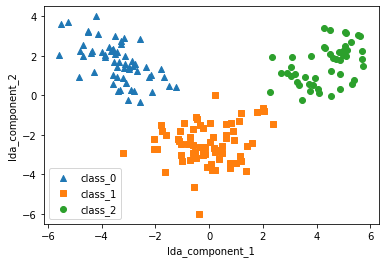

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ["lda_component_1", "lda_component_2"]
wine_lda = pd.DataFrame(X_lda, columns = lda_columns)
wine_lda["target"] = Y
markers = ["^","s","o"]

for i, marker in enumerate(markers):
    x_axis_data = wine_lda[wine_lda["target"]==i]["lda_component_1"]
    y_axis_data = wine_lda[wine_lda["target"]==i]["lda_component_2"]
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = wine.target_names[i])
    
plt.legend()
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")